In [1]:
import pandas as pd

In [2]:
PATH_TO_FILE = "./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107"

df = pd.read_csv(PATH_TO_FILE + ".csv")

filtered_col_names = []

for col_name in df.columns:
    if not "crude" in col_name.lower() and not "95ci" in col_name.lower():
        filtered_col_names.append(col_name)

filtered_df = df[filtered_col_names]

filtered_df.to_csv(PATH_TO_FILE + "_filtered.csv")

In [5]:
correlation_cols = []

exclude_cols = [
 'StateAbbr',
 'StateDesc',
 'CountyName',
 'CountyFIPS',
 'TotalPopulation',
 'Geolocation'
 ]
for col_name in filtered_col_names:
    if col_name not in exclude_cols:
        correlation_cols.append(col_name)

correlation_df = filtered_df[correlation_cols]


correlations = correlation_df.corr()
correlations["OBESITY_AdjPrev"].to_csv(PATH_TO_FILE + "_correlations.csv")

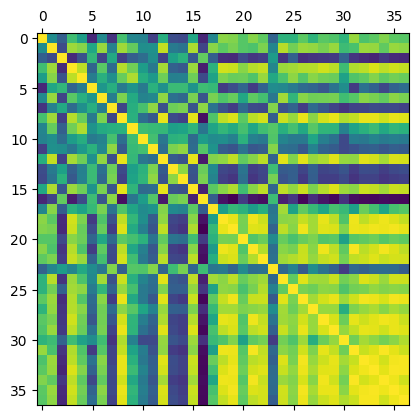

In [6]:
import matplotlib.pyplot as plt

plt.matshow(correlations)
plt.show()